In [2]:
import numpy as np
import pygimli as pg
from pygimli.physics import ert
import pygimli.meshtools as mt

In [28]:
data = ert.load('Surveys/full_data/nov_25_1.dat')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fd9f9a99450>)

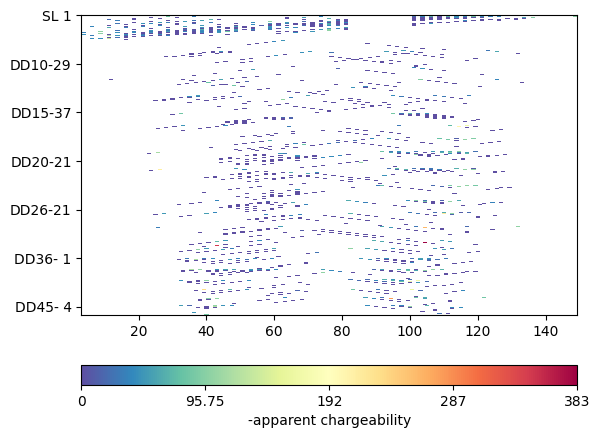

In [29]:
data.show("ip", label="-apparent chargeability")

In [30]:
data["k"] = ert.geometricFactors(data)

In [31]:
data["rhoa"] = data("r") * data("k") 

In [32]:
data.estimateError()

In [33]:
import seaborn as sns
import pandas as pd

<Axes: ylabel='Count'>

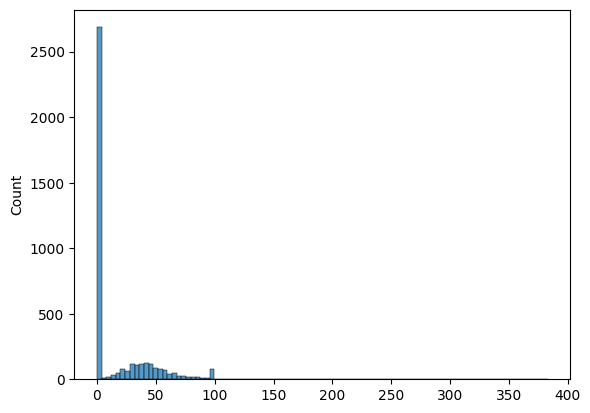

In [20]:
sns.histplot(data["ip"])

In [14]:
data.remove(data["ip"] < 0)

In [79]:
# replace zeros with 0.1
for i in range(len(data["ip"])):
    if data["ip"][i] <= 0:
        data["ip"][i] = 0.1

<Axes: ylabel='Count'>

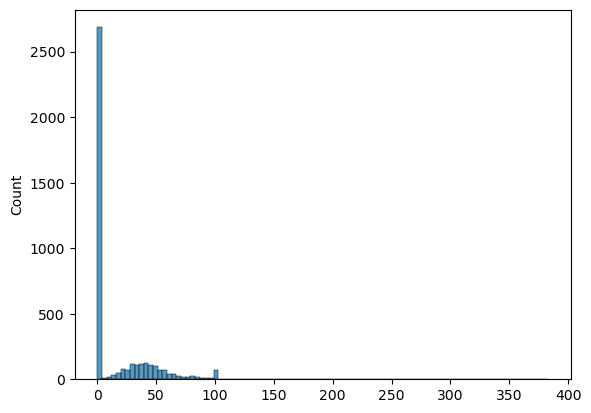

In [80]:
sns.histplot(data["ip"])

In [81]:
min(data["ip"])

0.1

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1f9837b9130>)

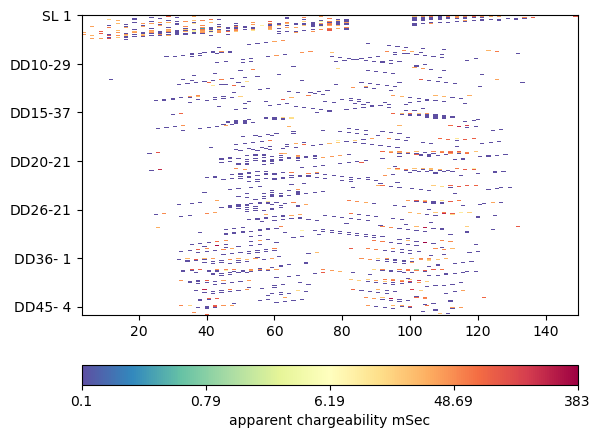

In [82]:
data.show("ip", label="apparent chargeability mSec")

In [64]:
print(data)

Data: Sensors: 64 data: 4067, nonzero entries: ['a', 'b', 'err', 'ip', 'k', 'm', 'n', 'r', 'rhoa', 'valid']


In [83]:
data.remove(data["ip"] > 100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1f983e5dfd0>)

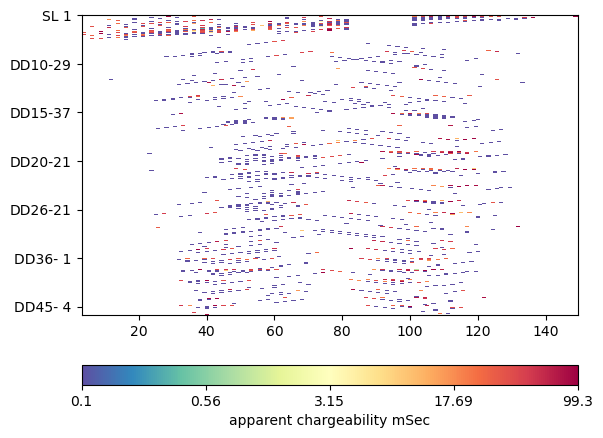

In [84]:
data.show("ip", label="apparent chargeability mSec")

In [85]:
mgr = ert.ERTIPManager(data)
mgr.invert(verbose=True, lam=50)

09/02/24 - 15:12:29 - pyGIMLi - INFO - Found 2 regions.
09/02/24 - 15:12:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/02/24 - 15:12:29 - pyGIMLi - INFO - Found 2 regions.
09/02/24 - 15:12:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/02/24 - 15:12:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
09/02/24 - 15:12:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
09/02/24 - 15:12:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2726 Cells: 5116 Boundaries: 4004
09/02/24 - 15:12:29 - pyGIMLi - INFO - Use median(data values)=115.03881138206025
09/02/24 - 15:12:29 - pyGIMLi - INFO - Created startmodel from forward operator: 1017, min/max=115.038811/115.038811
09/02/24 - 15:12:29 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F983B92630>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001F983B92770>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001F983B926D0>
min/max (data): 2.26/1.9e+04
min/max (error): 3%/3.04%
min/max (start model): 115/115
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1651.24
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1002.85 (dPhi = 39.15%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  809.54 (dPhi = 19.07%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  738.45 (dPhi = 8.57%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  686.66 (dPhi = 6.70%) lam: 50.0
--------------

09/02/24 - 15:14:08 - pyGIMLi - INFO - Found 1 regions.
09/02/24 - 15:14:08 - pyGIMLi - INFO - Starting inversion.


chi² =  559.14 (dPhi = 1.94%) lam: 50.0
################################################################################
#                Abort criterion reached: dPhi = 1.94 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x000001F983BC6CC0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001F983BA9F40>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001F986A2EE00>
min/max (data): 1.0e-04/0.1
min/max (error): 4.01%/1003%
min/max (start model): 1.0e-04/1.0e-04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  117.17
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  116.37 (dPhi = 0.69%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  110.28 (dPhi = 5.22%) lam: 1

(1450.0, 1490.006104)

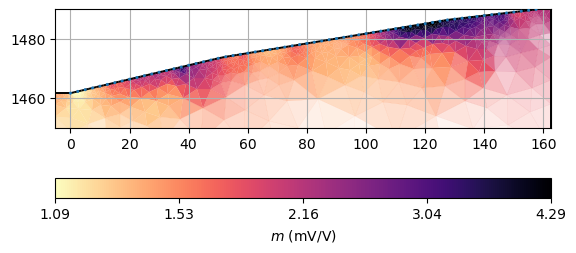

In [86]:
# Visualización de resultados con límites de color específicos
ax, cb = mgr.showIPModel(ipkw={})

# Ajustar la cuadrícula y los límites de los ejes para la gráfica
ax.grid(True)
ax.set_ylim([1450, ax.get_ylim()[1]])

(1450.0, 1490.006104)

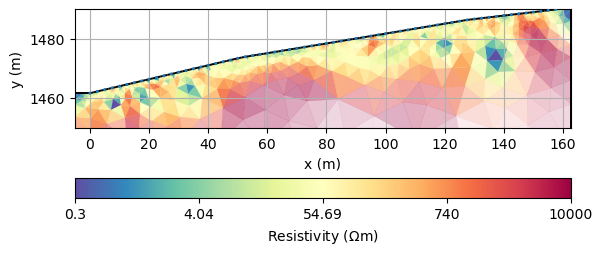

In [87]:
# Visualización de resultados con límites de color específicos
kw = dict(logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)", cMin=0, cMax=10000)
ax, cb = mgr.showResult(**kw)

# Ajustar la cuadrícula y los límites de los ejes para la gráfica
ax.grid(True)
ax.set_ylim([1450, ax.get_ylim()[1]])

## IP Inversion 2

In [34]:
data_array_ip = np.array(data["ip"])

In [35]:
data_series_ip = pd.Series(data_array_ip)

In [36]:
quantile_659_ip = data_series_ip.quantile(0.659)
quantile_659_ip

1.3098800000000028

In [37]:
data["ip"] = [quantile_659_ip if ip < quantile_659_ip else ip for ip in data["ip"]] 

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fd9f9b25c90>)

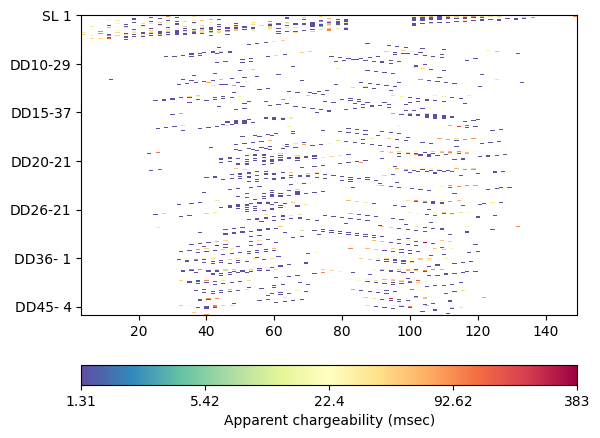

In [38]:
data.show("ip", label="Apparent chargeability (msec)")

In [39]:
mgr2 = ert.ERTIPManager(data)

In [40]:
inv2 = mgr2.invert(verbose=True)

13/02/24 - 18:48:01 - pyGIMLi - INFO - Found 2 regions.
13/02/24 - 18:48:01 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


13/02/24 - 18:48:01 - pyGIMLi - INFO - Found 2 regions.
13/02/24 - 18:48:01 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
13/02/24 - 18:48:01 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/02/24 - 18:48:01 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/02/24 - 18:48:01 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2726 Cells: 5116 Boundaries: 4004
13/02/24 - 18:48:01 - pyGIMLi - INFO - Use median(data values)=114.5778443471115
13/02/24 - 18:48:01 - pyGIMLi - INFO - Created startmodel from forward operator: 1017 [114.5778443471115,...,114.5778443471115]
13/02/24 - 18:48:01 - pyGIMLi - INFO - Starting inversion.


Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  1

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  1

Statistics:

  Input vertices: 135
  Input segments: 136
  Input holes: 0

  Mesh vertices: 724
  Mesh triangles: 1279
  Mesh edges: 2002
  Mesh exterior boundary edges: 167
  Mesh interior boundary edges: 26
  Mesh subsegments (constrained edges): 193

min/max(dweight) = 32.8488/33.3333
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7fd9fa075e90>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7fd9fa077880>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x7fd9fa0750d0>
min/max (data): 2.

13/02/24 - 18:49:47 - pyGIMLi - INFO - Found 1 regions.
13/02/24 - 18:49:47 - Core - INFO - Create H2 refined mesh for forward tasks.
13/02/24 - 18:49:47 - pyGIMLi - INFO - Starting inversion.


sens sum: median = 11.2906 min = -12.5243 max = 127.752
... 8.43821 s
solve CGLSCDWWtrans with lambda = 20
Calculating response for model: min = 0.0216389 max = 7.16503e+09
Using existing primary potentials.
Forward: time: 0.428371s
Found neg. resp (saving).
20 -6.60925 -9.13687
24 33 40 41
Response: min = -26.5982 max = 801.884 mean = 103.221
Reciprocity rms(modelReciprocity) 49.9942%, max: 2253.54%
7: LS newModel: min = 0.0216389; max = 7.16503e+09
7: LS newResponse: min = 0.284283; max = 812.627
7: rms/rrms(data, LS newResponse) = 619.627/120.692%
7: chi^2(data, LS newResponse, error, log) = 1460.06
7: Phi = 5.93807e+06+3325.83*20=6.00459e+06
Linesearch tau = 0.06
chi² = 660.35 (dPhi = 1.6%) lam: 20.0
################################################################################
#                 Abort criteria reached: dPhi = 1.6 (< 2.0%)                  #
################################################################################
Calculating response for model: min = 0.892

(1440.0, 1490.006104)

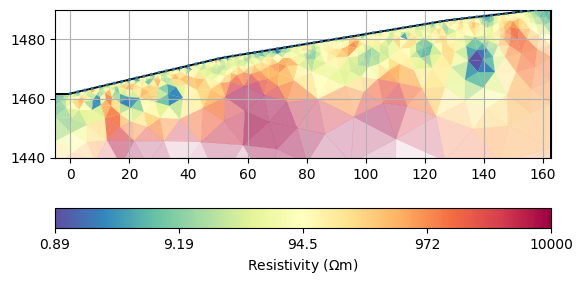

In [41]:
kw = dict(logscale=True, cMax=10000)
ax, cb = mgr2.showResult(**kw)
ax.grid(True)
ax.set_ylim([1440, ax.get_ylim()[1]])

(1440.0, 1490.006104)

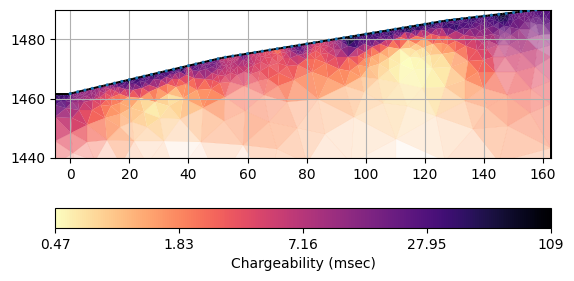

In [42]:
ax, cb = mgr2.showIPModel(ipkw={'cMax' : 27.95}, label="Chargeability (msec)")
ax.grid(True)
ax.set_ylim([1440, ax.get_ylim()[1]])